In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.
C:\Users\iosif.furtuna\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iosif.furtuna\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iosif.furtuna\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [2]:
path = "Images"
annot = "annots"

cam_image15.jpg
IMG_2577.JPG
IMG_2609.JPG
IMG_2615.JPG
IMG_2638.JPG
IMG_2642.JPG
IMG_2643.JPG
IMG_2588.JPG
IMG_2549.JPG
IMG_2588.JPG
IMG_2567.JPG
IMG_2627.JPG
IMG_2486.JPG
IMG_2589.JPG
IMG_2659.JPG
IMG_2521.JPG
IMG_2603.JPG
IMG_2671.JPG
IMG_2574.JPG
IMG_2507.JPG
IMG_2633.JPG
IMG_2464.JPG
IMG_2465.JPG
IMG_2481.JPG
IMG_2626.JPG
IMG_2607.JPG
IMG_2611.JPG
IMG_2648.JPG
IMG_2650.JPG
IMG_2421.JPG
IMG_2439.JPG
IMG_2455.JPG
IMG_2593.JPG
IMG_2682.JPG
IMG_2572.JPG
IMG_2474.JPG
IMG_2473.JPG
IMG_2657.JPG
IMG_2562.JPG
IMG_2581.JPG
IMG_2586.JPG
IMG_2587.JPG
IMG_2527.JPG
IMG_2658.JPG
IMG_2587.JPG
IMG_2612.JPG
IMG_2685.JPG
IMG_2582.JPG
IMG_2480.JPG
IMG_2563.JPG
IMG_2569.JPG
IMG_2621.JPG
IMG_2684.JPG
IMG_2492.JPG
IMG_2515.JPG
IMG_2610.JPG
IMG_2629.JPG
IMG_2664.JPG
IMG_2623.JPG
IMG_2652.JPG
IMG_2683.JPG
IMG_2697.JPG
IMG_2431.JPG
IMG_2613.JPG
IMG_2701.JPG
IMG_2518.JPG
IMG_2638.JPG
IMG_2388.JPG
IMG_2420.JPG
IMG_2424.JPG
IMG_2704.JPG
IMG_2599.JPG
IMG_2695.JPG
IMG_2700.JPG
IMG_2548.JPG
IMG_2558.JPG
IMG_2579.

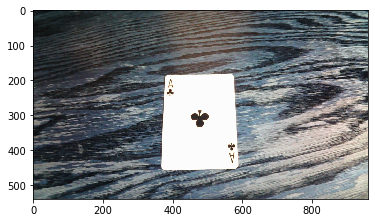

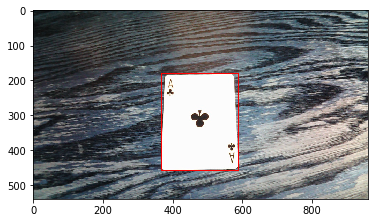

In [3]:
filename = "cam_image15.jpg"
img = cv2.imread(os.path.join(path,filename))
print(filename)
df = pd.read_csv(os.path.join(annot,"labels.csv"))
plt.imshow(img)
df = pd.DataFrame(df)
for row in df.iterrows():
    print(row[1][0])
    if row[1][0] == "cam_image15.jpg":
        x1 = int(row[1][4])
        y1 = int(row[1][5])
        x2 = int(row[1][6])
        y2 = int(row[1][7])
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
plt.figure()
plt.imshow(img)

In [4]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

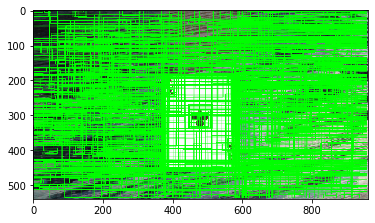

In [5]:
im = cv2.imread(os.path.join(path,"cam_image15.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [6]:
train_images=[]
train_labels=[]

In [7]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [8]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [9]:
filename = list()
label  = list()
try:
    df = pd.read_csv(os.path.join(annot,"labels.csv"))
    df = pd.DataFrame(df)
    for row in df.iterrows():
        filename.append(row[1][0])
        label.append(row[1][3])
    for i in range(len(filename)):
        gtvalues=[]
        rowData = df.loc[[i], :]
        print(rowData)
        for row in rowData.iterrows():
            file = row[1][0]
            cls = row[1][3]
            x1 = int(row[1][4])
            y1 = int(row[1][5])
            x2 = int(row[1][6])
            y2 = int(row[1][7])
            gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
        image = cv2.imread(os.path.join(path,filename[i]))
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = image.copy()
        count = 0
        b_count = 0
        f_count = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and count !=1 :
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if iou > 0.7 and f_count < 1:
                        timage = imout[y:y+h,x:x+w]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(resized)
                        if cls == "ace":
                            train_labels.append(1)
                            f_count += 1
                        if cls == "king":
                            train_labels.append(2)
                            f_count += 1
                        if cls == "jack":
                            train_labels.append(3)
                            f_count += 1
                    if iou < 0.3 and b_count < 1:
                        timage = imout[y:y+h,x:x+w]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(resized)
                        train_labels.append(4)
                        b_count += 1
                    if f_count >= 1 and b_count >= 1:
                        count = 1
        del gtvalues
except Exception as e:
    print(e)
    print("error in ")
print(*filename)
print(*label)
#print(*gtvalues)

       filename  width  height class  xmin  ymin  xmax  ymax
0  IMG_2577.JPG    378     504   ace     1    65   105   196
       filename  width  height class  xmin  ymin  xmax  ymax
1  IMG_2609.JPG    378     504  king     1   120   175   321
       filename  width  height class  xmin  ymin  xmax  ymax
2  IMG_2615.JPG    378     504  king     1   289    71   456
       filename  width  height class  xmin  ymin  xmax  ymax
3  IMG_2638.JPG    378     504  jack     1   126   214   368
       filename  width  height class  xmin  ymin  xmax  ymax
4  IMG_2642.JPG    378     504   ace     1     1    56    98
       filename  width  height class  xmin  ymin  xmax  ymax
5  IMG_2643.JPG    378     504  king     1    44   143   236
       filename  width  height class  xmin  ymin  xmax  ymax
6  IMG_2588.JPG    378     504  king     6    58   149   202
       filename  width  height class  xmin  ymin  xmax  ymax
7  IMG_2549.JPG    378     504  jack     7   268   232   396
       filename  width  

        filename  width  height class  xmin  ymin  xmax  ymax
67  IMG_2420.JPG    378     504   ace    69   172   229   398
        filename  width  height class  xmin  ymin  xmax  ymax
68  IMG_2424.JPG    378     504   ace    69   236   168   368
        filename  width  height class  xmin  ymin  xmax  ymax
69  IMG_2704.JPG    378     504  jack    70   110   301   426
        filename  width  height class  xmin  ymin  xmax  ymax
70  IMG_2599.JPG    378     504  king    73   221   150   453
        filename  width  height class  xmin  ymin  xmax  ymax
71  IMG_2695.JPG    378     504  king    73   110   304   426
        filename  width  height class  xmin  ymin  xmax  ymax
72  IMG_2700.JPG    378     504   ace    74   105   303   425
        filename  width  height class  xmin  ymin  xmax  ymax
73  IMG_2548.JPG    378     504  jack    76   184   162   421
        filename  width  height class  xmin  ymin  xmax  ymax
74  IMG_2558.JPG    378     504  king    77   354   192   439
        

         filename  width  height class  xmin  ymin  xmax  ymax
133  IMG_2664.JPG    378     504  jack   122   149   288   368
         filename  width  height class  xmin  ymin  xmax  ymax
134  IMG_2682.JPG    378     504   ace   122   138   350   432
         filename  width  height class  xmin  ymin  xmax  ymax
135  IMG_2418.JPG    378     504   ace   124   126   242   284
         filename  width  height class  xmin  ymin  xmax  ymax
136  IMG_2546.JPG    378     504   ace   127   214   240   352
         filename  width  height class  xmin  ymin  xmax  ymax
137  IMG_2407.JPG    378     504  jack   128   196   243   357
         filename  width  height class  xmin  ymin  xmax  ymax
138  IMG_2553.JPG    378     504  jack   128   245   243   430
         filename  width  height class  xmin  ymin  xmax  ymax
139  IMG_2457.JPG    378     504  jack   129   209   264   371
         filename  width  height class  xmin  ymin  xmax  ymax
140  IMG_2577.JPG    378     504  jack   131    31   27

         filename  width  height class  xmin  ymin  xmax  ymax
198  IMG_2621.JPG    378     504   ace   216   109   339   271
         filename  width  height class  xmin  ymin  xmax  ymax
199  IMG_2563.JPG    378     504  king   218   158   349   313
         filename  width  height class  xmin  ymin  xmax  ymax
200  IMG_2512.JPG    378     504   ace   221   245   354   362
            filename  width  height class  xmin  ymin  xmax  ymax
201  cam_image48.jpg    960     540   ace   223    42   394   269
         filename  width  height class  xmin  ymin  xmax  ymax
202  IMG_2559.JPG    378     504  king   224    77   331   205
         filename  width  height class  xmin  ymin  xmax  ymax
203  IMG_2617.JPG    378     504   ace   224   122   300   348
         filename  width  height class  xmin  ymin  xmax  ymax
204  IMG_2621.JPG    378     504  king   230   300   340   450
         filename  width  height class  xmin  ymin  xmax  ymax
205  IMG_2558.JPG    378     504   ace   231   32

           filename  width  height class  xmin  ymin  xmax  ymax
262  cam_image3.jpg    960     540  king   501   291   674   513
            filename  width  height class  xmin  ymin  xmax  ymax
263  cam_image42.jpg    960     540   ace   503   249   652   448
            filename  width  height class  xmin  ymin  xmax  ymax
264  cam_image41.jpg    960     540   ace   512   279   694   513
            filename  width  height class  xmin  ymin  xmax  ymax
265  cam_image47.jpg    960     540  jack   513    17   712   258
            filename  width  height class  xmin  ymin  xmax  ymax
266  cam_image48.jpg    960     540   ace   515   299   696   540
            filename  width  height class  xmin  ymin  xmax  ymax
267  cam_image51.jpg    960     540  jack   530   154   696   371
            filename  width  height class  xmin  ymin  xmax  ymax
268  cam_image52.jpg    960     540  king   545    27   710   255
            filename  width  height class  xmin  ymin  xmax  ymax
269  cam_ima

In [10]:
import gc
X_new = np.array(train_images)
y_new = np.array(train_labels)

del train_images
del train_labels
gc.collect()

2289

In [11]:
for i in y_new:
    print(i)

4
1
2
4
4
2
4
3
4
1
4
2
4
2
4
3
4
1
4
3
2
4
4
2
4
3
4
1
4
2
4
4
2
4
3
4
2
4
4
2
4
2
4
3
4
2
4
3
4
3
4
1
4
1
4
2
4
2
4
3
4
1
4
1
4
2
4
1
4
1
4
2
4
2
4
3
4
2
4
1
4
3
4
3
4
1
4
1
4
2
4
1
2
4
4
1
4
1
4
3
4
2
4
1
4
3
4
3
4
1
4
4
1
4
3
4
2
4
2
4
3
4
3
4
3
4
2
4
1
4
2
4
1
4
1
4
3
4
2
4
2
4
1
4
3
4
2
4
3
4
1
4
1
4
2
4
3
4
2
4
2
4
1
4
3
4
2
4
2
4
1
4
2
4
2
4
3
4
1
4
2
4
1
4
1
4
3
4
1
4
3
4
1
4
2
4
3
4
1
4
1
4
2
4
3
4
1
4
1
4
2
4
1
4
1
4
1
4
2
4
2
4
1
4
2
4
2
4
1
4
2
4
2
4
1
4
3
4
3
4
2
4
1
4
1
4
3
4
2
4
1
4
3
4
3
4
1
4
2
4
4
3
4
3
4
1
4
1
4
1
4
3
4
3
4
3
4
3
4
2
4
3
4
2
4
3
4
2
4
3
4
3
4
2
4
1
4
1
4
2
4
1
4
3
4
1
4
2
4
1
4
3
4
3
4
4
3
4
3
4
2
4
3
4
3
4
1
4
3
1
4
4
3
4
2
4
1
4
2
4
2
4
3
4
3
4
2
4
2
4
3
4
1
4
2
4
2
4
2
4
2
4
1
4
3
4
3
4
3
4
3
4
3
4
3
4
2
4
2
4
2
4
3
4
3
4
3
4
2
4
3
4
1
4
2
4
1
4
1
4
2
4
1
4
2
4
1
4
2
4
3
4
2
4
1
4
1
1
4
4
1
4
4
2
4
1
4
1
4
3
4
1
4
2
4
2
4
2
4
3
4
1
4
1
4
1
4
3
4
1
4
3
4
3
4
2
4
3
1
4
4
2
4
2
4
2
4
3
4
2
4
2
4
1
4
2
4
3
4
3
4
3
4
3
4
2
4
3
4
2
4
1
4
1
4
1
4
1
4
3


In [12]:
print(X_new.shape)
print(y_new.shape)

(546, 224, 224, 3)
(546,)


2


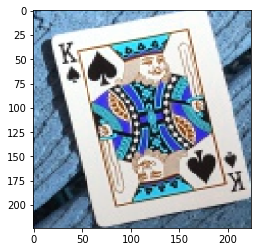

In [14]:
print(y_new[400])
im = X_new[400]
plt.imshow(im)

In [15]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [17]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [18]:
X= vggmodel.layers[-2].output

In [19]:
predictions = Dense(4, activation="softmax")(X)

In [20]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [21]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [22]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [23]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [25]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [26]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [27]:

X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.20)

In [28]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(436, 224, 224, 3) (110, 224, 224, 3) (436, 4) (110, 4)


In [29]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [31]:
checkpoint = ModelCheckpoint("rcnn_model.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [32]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 3, epochs= 5, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4/4 [==============================] - 39s 10s/step - loss: 0.2753 - acc: 0.8909

Epoch 00001: val_loss improved from inf to 0.27531, saving model to rcnn_model.h5
14/14 [==============================] - 241s 17s/step - loss: 0.8094 - acc: 0.7362 - val_loss: 0.2753 - val_acc: 0.8909
Epoch 2/5
4/4 [==============================] - 39s 10s/step - loss: 0.1501 - acc: 0.9636

Epoch 00002: val_loss improved from 0.27531 to 0.15005, saving model to rcnn_model.h5
14/14 [==============================] - 241s 17s/step - loss: 0.2512 - acc: 0.9266 - val_loss: 0.1501 - val_acc: 0.9636
Epoch 3/5
4/4 [==============================] - 39s 10s/step - loss: 0.1686 - acc: 0.9545

Epoch 00003: val_loss did not improve from 0.15005
14/14 [==============================] - 236s 17s/step - loss: 0.0942 - acc: 0.9610 - val_loss: 0.1686 - val_acc: 0.9545
Epoch 4/5
4/4 [==============================] - 40s 10s/step - loss: 0.3282 - acc: 0.9000

Ep

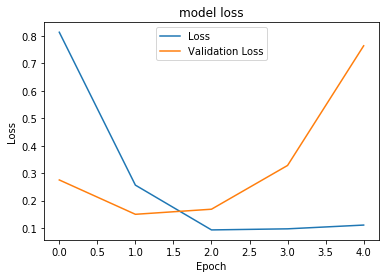

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

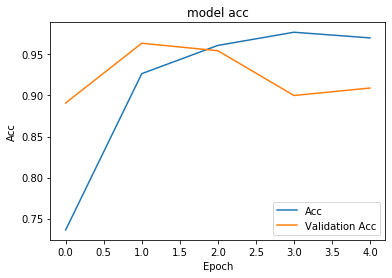

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title("model acc")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend(["Acc","Validation Acc"])
plt.show()
plt.savefig('chart acc.png')

King 0.9793012
{0.9793012: (529, 314, 118, 174)}
King 0.9998294
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184)}
King 0.99936444
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184), 0.99936444: (466, 97, 226, 185)}
King 0.99991035
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184), 0.99936444: (466, 97, 226, 185), 0.99991035: (504, 290, 168, 225)}
King 0.99987364
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184), 0.99936444: (466, 97, 226, 185), 0.99991035: (504, 290, 168, 225), 0.99987364: (500, 90, 156, 185)}
King 0.97331595
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184), 0.99936444: (466, 97, 226, 185), 0.99991035: (504, 290, 168, 225), 0.99987364: (500, 90, 156, 185), 0.97331595: (329, 315, 145, 186)}
King 0.98618364
{0.9793012: (529, 314, 118, 174), 0.9998294: (327, 105, 150, 184), 0.99936444: (466, 97, 226, 185), 0.99991035: (504, 290, 168, 225), 0.99987364: (500, 90, 156, 185), 0.97331595: (329, 31

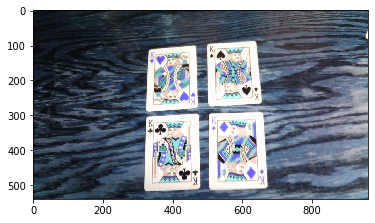

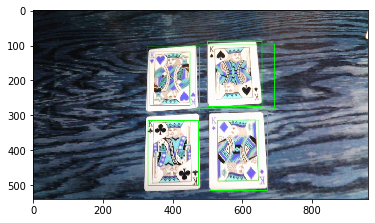

In [45]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

pred = {}

path = "Test"
model = load_model('rcnn_model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
img = cv2.imread(os.path.join(path,"test.jpg"))
plt.figure()
plt.imshow(img)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
counter = 0
for e,result in enumerate(ssresults):
    if e < 250:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model.predict(img)
        
        if max( *[ out[0][0], out[0][1], out[0][2], out[0][3]] ) == out[0][1] and out[0][1] > 0.95:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
            print("King " + str(out[0][1]))
            pred[out[0][1]] = x,y,w,h
            print(pred)
plt.figure()
plt.imshow(imout)

In [46]:
l=list(pred.items())
l.sort(reverse=True)
print('Descending order is',l)

Descending order is [(0.99991035, (504, 290, 168, 225)), (0.99991024, (500, 88, 155, 188)), (0.99987364, (500, 90, 156, 185)), (0.9998294, (327, 105, 150, 184)), (0.99936444, (466, 97, 226, 185)), (0.98618364, (334, 119, 116, 153)), (0.9793012, (529, 314, 118, 174)), (0.97331595, (329, 315, 145, 186))]


In [47]:
l[0][1][0]

504

In [48]:
list_fin = list()
while len(l) != 0:
    list_iou = list()
    list_obj = list()
    
    if len(l) == 1:
        list_fin.append(l[0])
        break
        
    i = 1
    for e in range(len(l)-1):
        iou = get_iou({"x1":l[0][1][0],"x2":l[0][1][0]+l[0][1][2],"y1":l[0][1][1],"y2":l[0][1][1]+l[0][1][3]},{"x1":l[i][1][0],"x2":l[i][1][0]+l[i][1][2],"y1":l[i][1][1],"y2":l[i][1][1]+l[i][1][3]})
        list_iou.append(iou)
        i += 1
    
    list_fin.append(l[0])
    index = 1
    for i in list_iou:
        if i < 0.50:
            list_obj.append(l[index])
        index += 1
    l = list_obj
    del list_obj
print(list_fin)

[(0.99991035, (504, 290, 168, 225)), (0.99991024, (500, 88, 155, 188)), (0.9998294, (327, 105, 150, 184)), (0.97331595, (329, 315, 145, 186))]


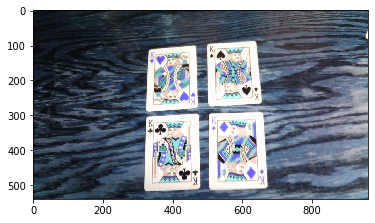

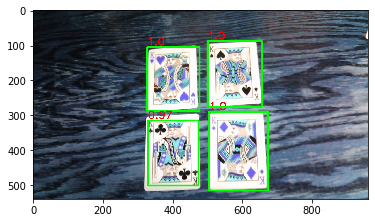

In [49]:
path = "Test" 
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.imread(os.path.join(path,"test.jpg")) 
plt.figure() 
plt.imshow(img)
for i in range(len(list_fin)):    
    cv2.rectangle(img, (list_fin[i][1][0], list_fin[i][1][1]), (list_fin[i][1][0]+list_fin[i][1][2], list_fin[i][1][1]+list_fin[i][1][3]), (0, 255, 0), 3, cv2.LINE_AA)
    cv2.putText(img,str(float("{:.2f}".format(list_fin[i][0]))),(list_fin[i][1][0],list_fin[i][1][1]-5), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
plt.figure() 
plt.imshow(img)